28 
 28
28 
 28
28 
 28


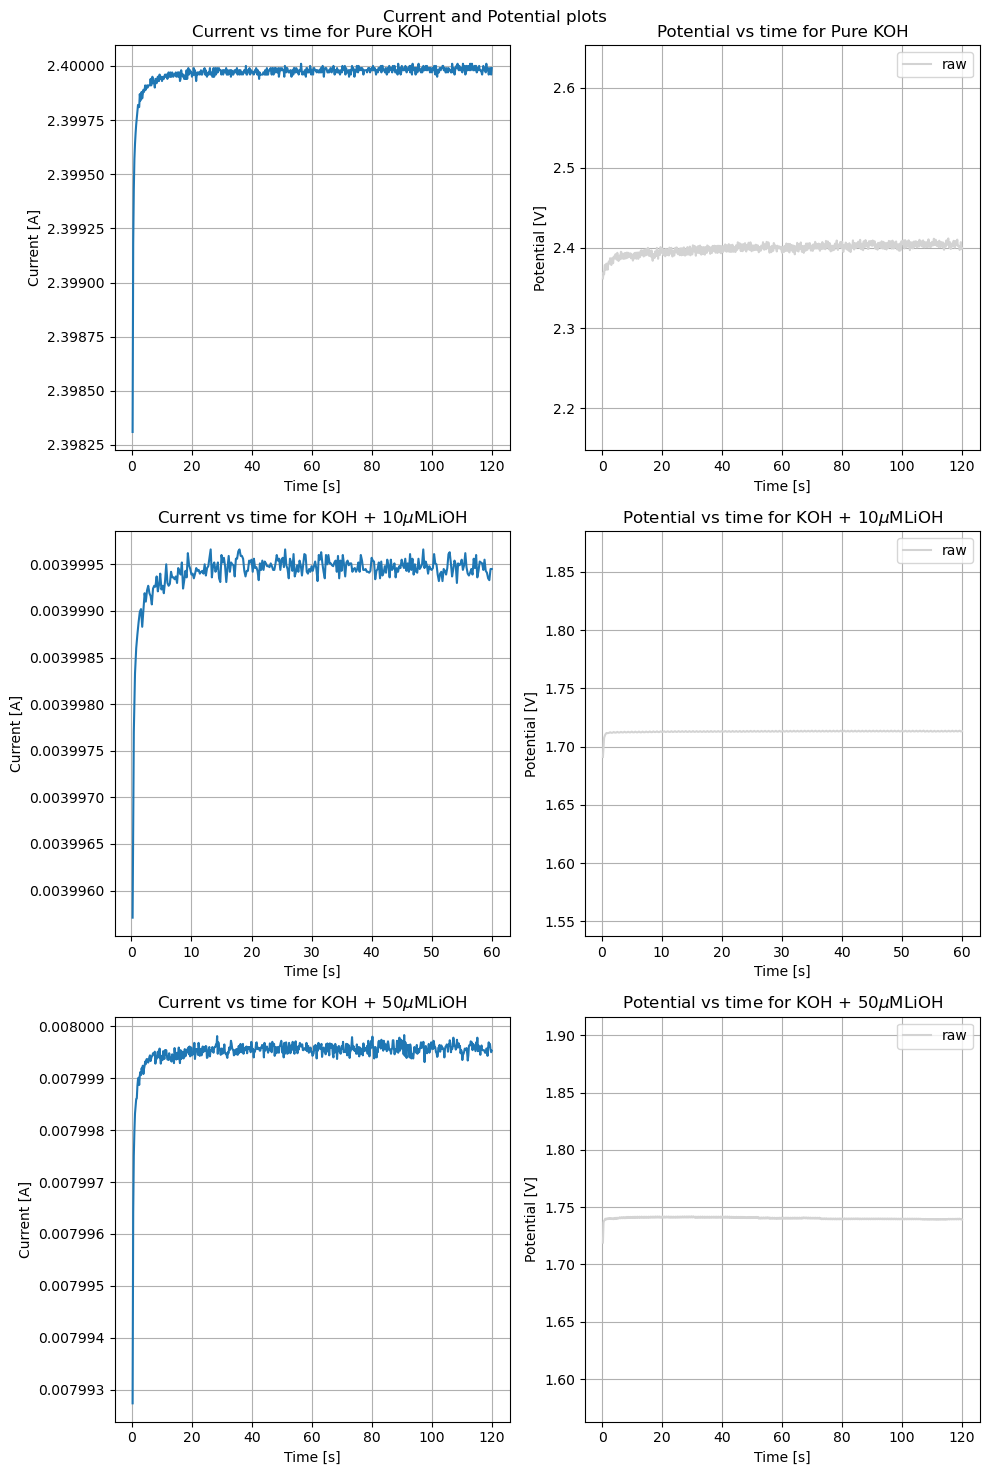

In [41]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt
import numpy as np





datetimes_start = [(2024, 11, 15, 16,  0, 0), (2024, 11, 15, 12,  0, 0), (2024, 11, 19, 12,  0, 0) ]
datestimes_end =  [(2024, 11, 15, 18, 30, 0), (2024, 11, 15, 13, 30, 0), (2024, 11, 19, 14, 30, 0)]
foldernames = ['experiment 2 6.5M KOH 10mM LiOH', 'experiment1 6.5M KOH', 'exp3- 6.5MKOHplus50mM LiOH']
nice_titles = ['Pure KOH', 'KOH + 10$\\mu$MLiOH', 'KOH + 50$\\mu$MLiOH']
experiments = []

for idx in range(len(foldernames)):
    exp = Measurement(datetimes_start[idx], datestimes_end[idx], foldernames[idx])
    experiments.append(exp)

fig, ax = plt.subplots(ncols = 2, nrows = len(experiments), figsize = (10, 5*len(experiments)))
ax = ax.flatten()
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    data = exp.TRScans[0]
    ax = ax.flatten()
    fig.suptitle('Current and Potential plots')
    ax[i*2].set_title('Current vs time for ' + nice_titles[i])
    ax[i*2].plot(data['time'], data['I'])
    ax[i*2].grid()
    ax[i*2].set_xlabel('Time [s]')
    ax[i*2].set_ylabel('Current [A]')
    ax[i*2+1].set_title('Potential vs time for ' + nice_titles[i])
    ax[i*2+1].plot(data['time'], data['V'], label = 'raw', color = 'lightgrey')
    ax[i*2+1].grid()
    ax[i*2+1].set_xlabel('Time [s]')
    ax[i*2+1].set_ylabel('Potential [V]')
    ax[i*2+1].legend()
    ax[i*2+1].set_ylim(min(data['V'])/1.1, max(data['V'])*1.1)

fig.tight_layout()

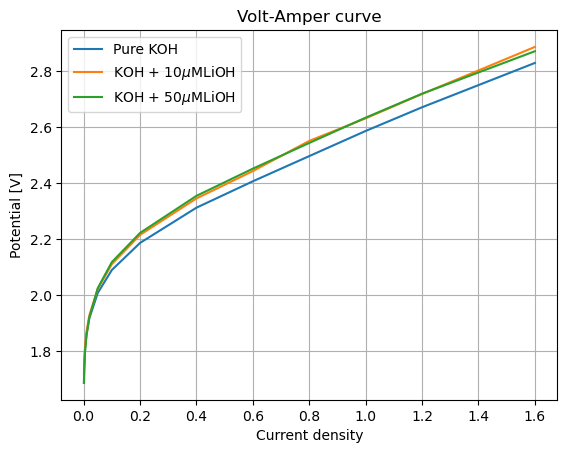

In [49]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.VAC_dataframe.sort_values(by = 'J')
    plt.plot(exp.VAC_dataframe['J'], exp.VAC_dataframe['V'], label = nice_titles[i])


plt.grid(which='both')
plt.title('Volt-Amper curve')
plt.xlabel('Current density')
plt.ylabel('Potential [V]')
plt.legend()

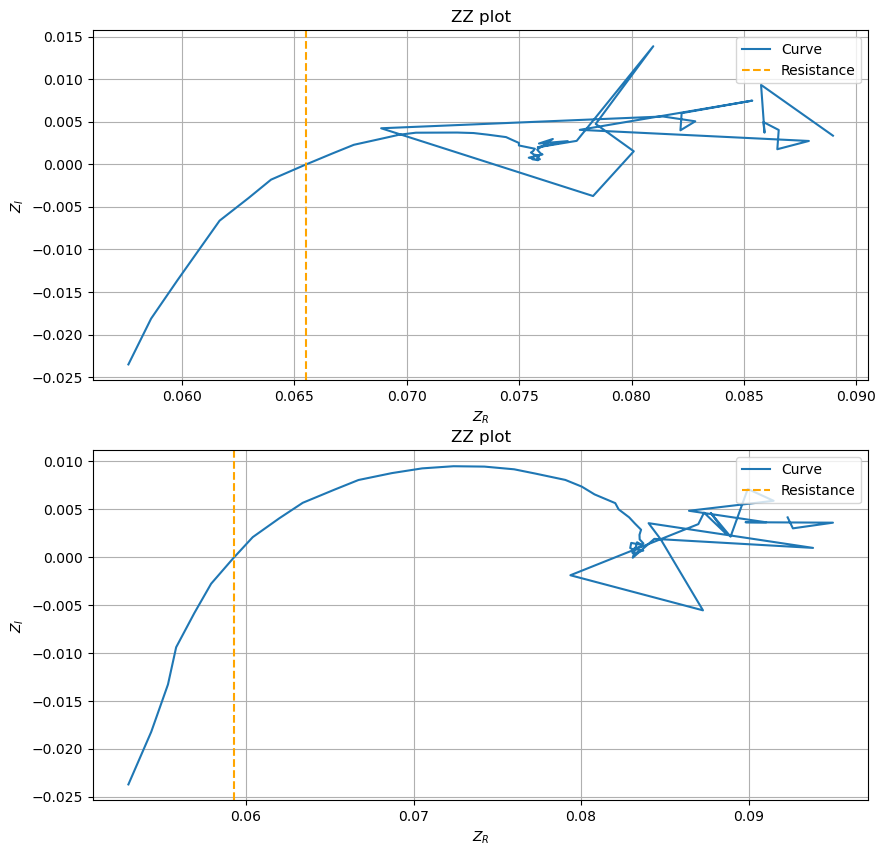

In [43]:
data = A.ZZplots[:2]
#data['potential_filtered'] = medfilt(data['potential'], kernel_size=11)
ws = 10


fig, ax = plt.subplots(nrows = len(data), figsize = (10, 5*len(data)))
for i in range(len(data)):
    ax[i].set_title('ZZ plot')
    ax[i].plot(data[i]['Zr'], data[i]['Zi'], label = 'Curve')
    ax[i].grid()
    ax[i].set_xlabel('$Z_R$')
    ax[i].set_ylabel('$Z_I$')
    ax[i].axvline(A.rs[i], linestyle ='--', color = 'orange', label = 'Resistance')
    ax[i].legend(loc = 'upper right')

Text(0, 0.5, 'Ohmic resistance [$\\Omega$]')

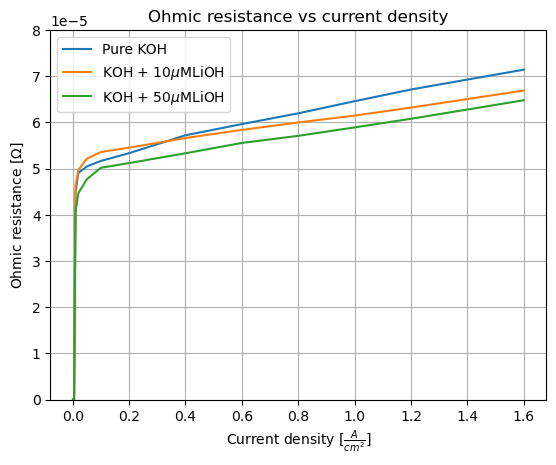

In [58]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.JR_dataframe['R']/1000, label = nice_titles[i])

plt.ylim(0,8e-5)
plt.grid(which='both')
plt.legend(loc = 'upper left')
plt.title('Ohmic resistance vs current density')
plt.xlabel('Current density [$\\frac{A}{cm^2}$]')
plt.ylabel('Ohmic resistance [$\\Omega$]')

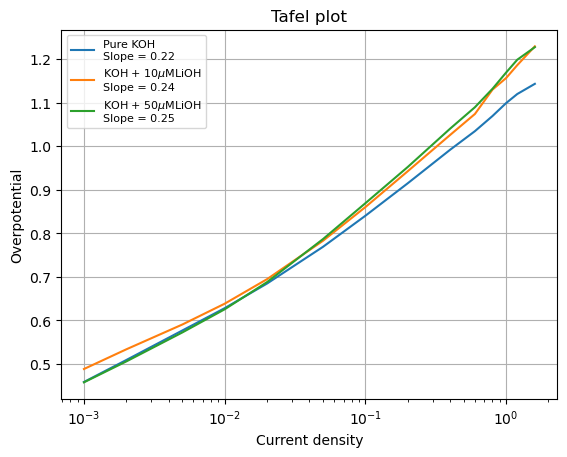

In [62]:
for i in range(max(1,len(experiments))):
    exp = experiments[i]
    exp.JR_dataframe.sort_values(by = 'J')
    plt.plot(exp.JR_dataframe['J'], exp.overpotential, label = nice_titles[i] + f'\nSlope = {exp.slope:.2f}')

plt.xscale('log')
plt.grid()
plt.title('Tafel plot')
plt.xlabel('Current density')
plt.ylabel('Overpotential')
plt.legend(fontsize = 8)